In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pyrcn.echo_state_network import ESNRegressor
# sns.heatmap(structural_mask)

In [17]:
# Read time-series from a all subjects into a list of numpy arrays
from os import listdir
import os.path as op
from numpy import genfromtxt

subfiles = [f for f in listdir('data_small') if op.isfile(op.join('data_small', f))
            and 'CON' in f]

sublist = []
for sub in subfiles:
    s = genfromtxt(op.join('data_small',sub), delimiter=',')
    sublist.append(s)

train_len = int(len(sublist[0]) * 0.6)

# Create train and test sets

In [18]:
train = np.array(sublist[0][:train_len, :])
for sub in sublist[1:]:
    new_arr = np.array(sub[:train_len, :])
    train = np.concatenate((train, new_arr), axis = 0)

In [19]:
test = np.array(sublist[0][train_len:, :])
for sub in sublist[1:]:
	new_arr = np.array(sub[train_len:, :])
	test = np.concatenate((test, new_arr), axis = 0)

In [20]:
train = train.T
test = test.T

In [21]:
r1i = 111 #index of the first region
r2i = 222 #index of the second region

In [22]:
X_train = train[r1i].reshape(-1, 1)
X_test = test[r1i].reshape(-1, 1)
y_train = train[r2i]
y_test = test[r2i]

# Create the regressor and fit it

In [23]:
reg = ESNRegressor(hidden_layer_size=50)

In [24]:
reg.fit(X=X_train, y=y_train)

ESNRegressor(input_to_node=InputToNode(hidden_layer_size=50),
             node_to_node=NodeToNode(hidden_layer_size=50),
             regressor=IncrementalRegression(), requires_sequence=False)

In [25]:
y_pred = reg.predict(X_test)


# Calculate performance

In [26]:
# correlation
np.corrcoef(y_test, y_pred)

array([[1.        , 0.18374712],
       [0.18374712, 1.        ]])

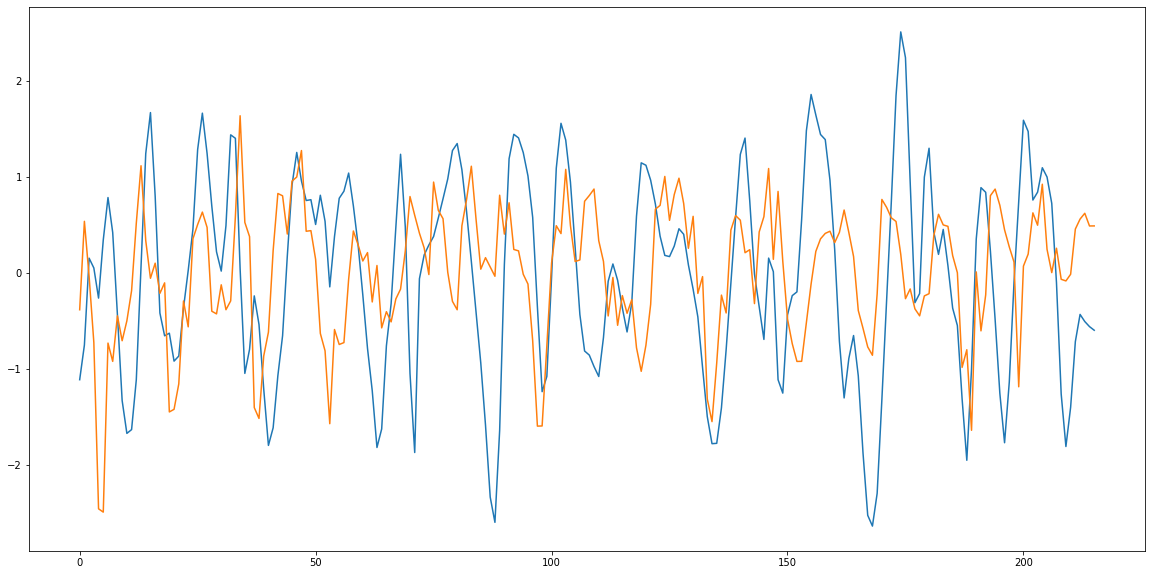

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')

In [28]:
# correlation on training set
y_pred_train = reg.predict(X_train)
np.corrcoef(y_train, y_pred_train)[0, 1]

0.4627617265865842

In [29]:
r1i = 22 #index of the first region
r2i = 222 #index of the second region
X_train = train[r1i].reshape(-1, 1)
X_test = test[r1i].reshape(-1, 1)
y_train = train[r2i]
y_test = test[r2i]

reg = ESNRegressor(hidden_layer_size=50)
reg.fit(X=X_train, y=y_train)
y_pred = reg.predict(X_test)

# correlation
np.corrcoef(y_test, y_pred)

array([[ 1.       , -0.0193836],
       [-0.0193836,  1.       ]])

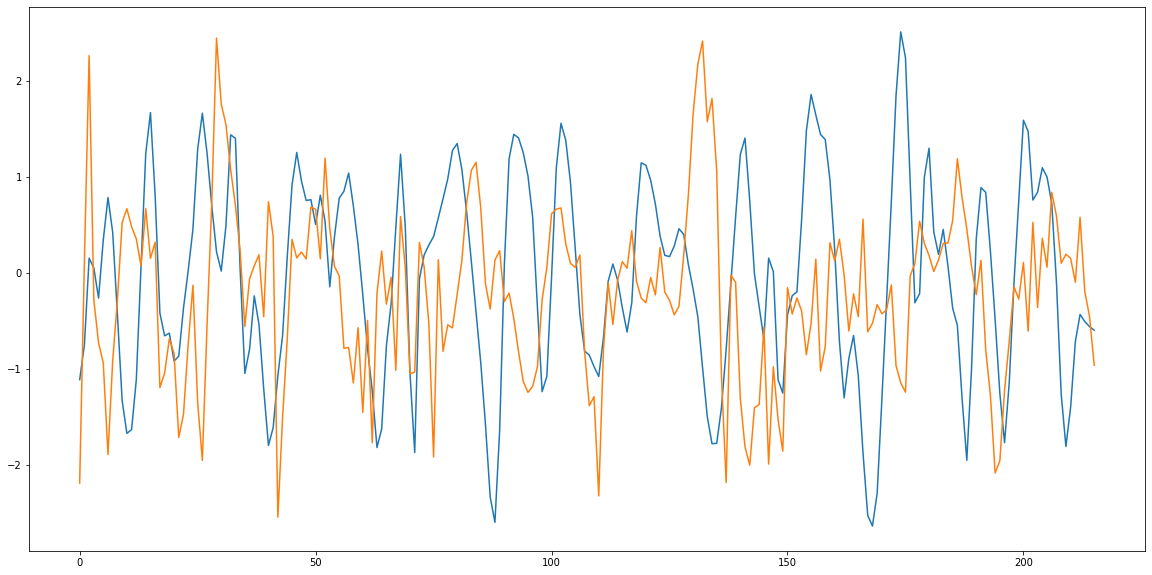

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')

In [31]:
# correlation on training set
y_pred_train = reg.predict(X_train)
np.corrcoef(y_train, y_pred_train)[0, 1]

0.5479211628928864